## Add weights to edges, remove excess nodes and compute shortest path

MultiDiGraph with 107 nodes and 7716 edges


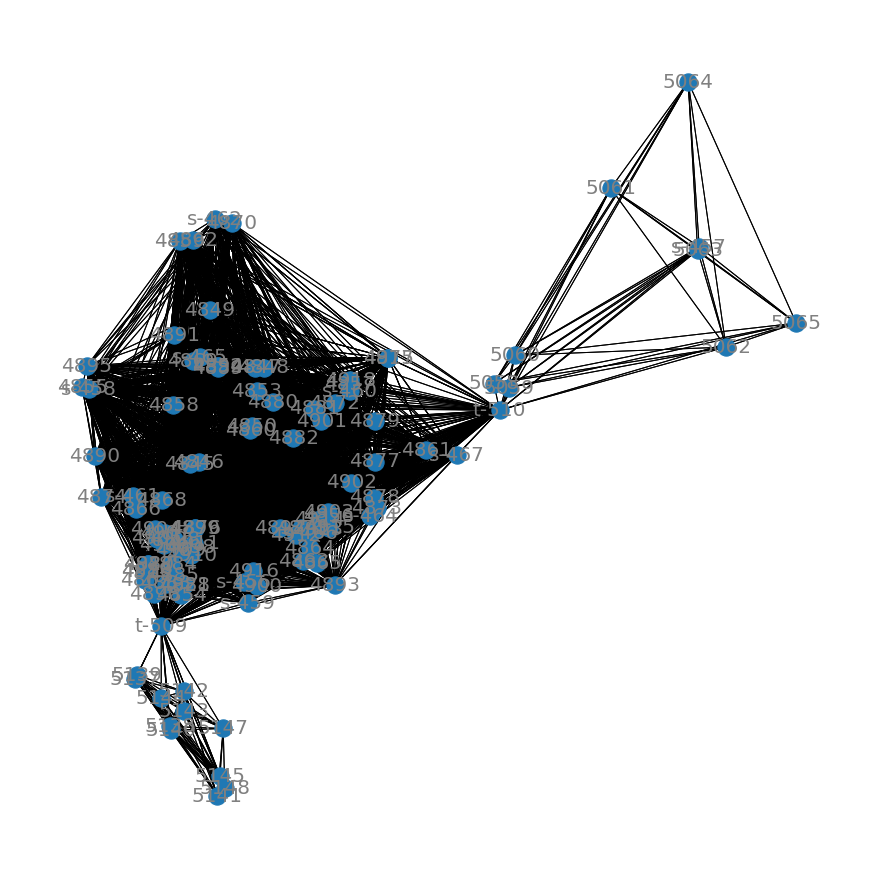

In [1]:
from math import inf

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

import oot_graph_builder as ogb

canvas_size = 12
font_color = 'gray'
font_size = 20
font_weight = 'bold'

all_actors_df = pd.read_csv("resources/VerboseOcarina/actors.csv", sep=';')
all_transition_actors_df = pd.read_csv("resources/VerboseOcarina/transition_actors.csv", sep=';')
all_spawns_df = pd.read_csv("resources/VerboseOcarina/spawns.csv", sep=';')

G_scene = ogb.build_scene_graph(all_spawns_df, all_actors_df, all_transition_actors_df, 85, 0, False)
pos_dict = ogb.get_pos_dict(G_scene, True)

nx.set_edge_attributes(G_scene, inf, 'weight')

s85setup0_fastest_edge_weights = [
    ('s-459', '4846', 5.17),
    ('4846', 't-509', 9.94),
    ('t-509', '5138', 11.23),
    ('5138', '5148', 3.57),
    ('5148', '5137', 19.16),
    ('5137', 't-509', 7.98),
    ('t-509', '4885', 10.53),
    ('4885', '4876', 3.25),
    ('4876', '4850', 8.78),
    ('4850', '4881', 3.65),
    ('4881', '4918', 8.86),
    ('4918', '4861', 19.42),
    # ('4881', '4861', 15.00),
]

G_scene.add_weighted_edges_from(s85setup0_fastest_edge_weights)

s85setup0_nodes_to_remove = [
    '4844',  # 4844,003B:0001,Ambient Sound Effects, Sound: Stream,,398,-29,-483,0,0,0,85,0,0,False,0
    '4851',  # 4851,0097:0000,Environmental Effects, Flying Fairies, Dustmotes,,355,1,-150,0,0,0,85,0,0,False,7
    '5057',  #,0097:0000,Environmental Effects, Flying Fairies, Dustmotes,,3409,-143,-818,0,0,0,85,1,0,False,0

    '4897',
    # Dummy Signpost in Room 0
    # 4897,0141:0340,Square Signpost, Message ID: 0340,,-784,120,1675,0,32768,0,85,0,0,False,53

    '5146',
    # Dummy Bush in Room 2
    # 5146,0125:FF00,Single Bush/Grass, Normal shrub. Random drops., Spawns set of 3 bugs: False, Random Drop Table: No Table,,-757,120,708,0,0,0,85,2,0,False,9

    's-463',
    # Wierd Spawn on top of Link's house
    # 85,False,0,0,7,0000:0DFF,"Link, Spawn Type: Stand, Camera Initial Focus: No Special Positioning,",-40,344,1244,0,26396,0
]

G_scene.remove_nodes_from(s85setup0_nodes_to_remove)

print(G_scene)
plt.figure(figsize=(canvas_size, canvas_size))
nx.draw(G_scene,
        pos_dict,
        arrows=False,
        with_labels=True,
        font_color=font_color,
        font_size=font_size,
        )

## Highlight route

['s-459', '4846', 't-509', '4885', '4876', '4850', '4881', '4918', '4861']
69.6
MultiDiGraph with 107 nodes and 7716 edges


{'s-459': Text(-31, -1073, 'Link'),
 '4846': Text(-459, -181, 'Collectibles'),
 '4850': Text(2, 45, 'Collectibles'),
 '4861': Text(1522, -105, 'Mido'),
 '4876': Text(-488, -600, 'Invisible Collectible'),
 '4881': Text(548, 158, 'Invisible Collectible'),
 '4885': Text(-677, -899, 'Invisible Collectible'),
 '4918': Text(861, 340, 'Dialog Spot'),
 't-509': Text(-785, -1219, 'Room changing plane')}

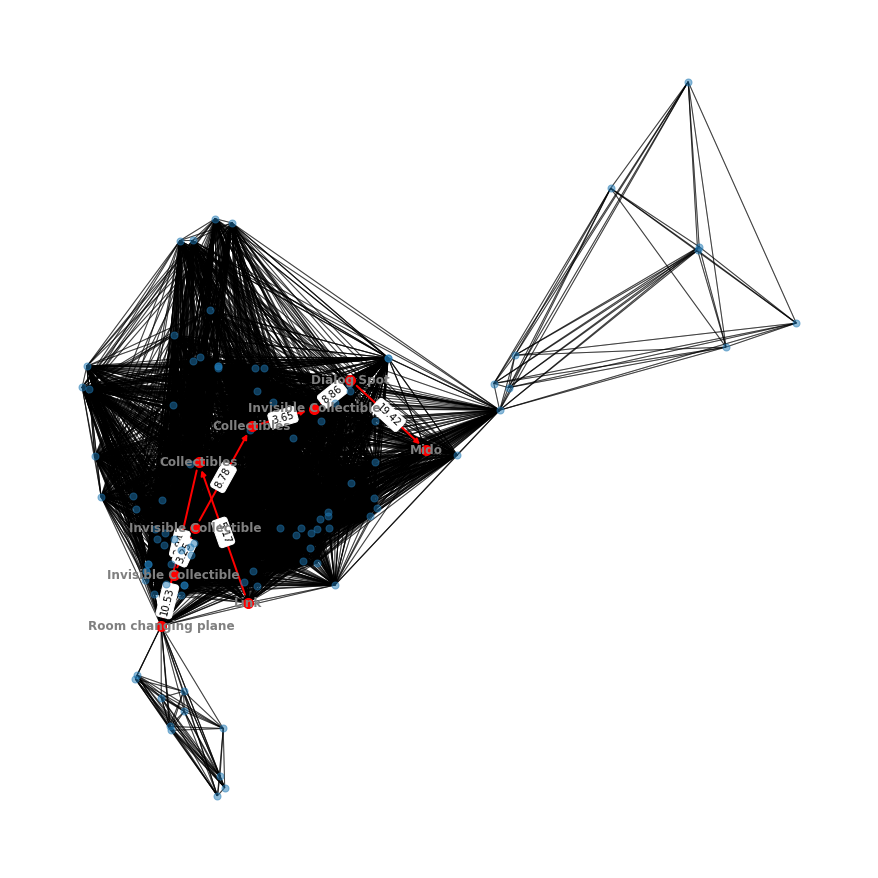

In [2]:
route = nx.shortest_path(G_scene,
                         source='s-459',
                         target='4861',
                         weight='weight'
                         )
print(route)
print(nx.path_weight(G_scene, route, 'weight'))
print(G_scene)

route_edges = list(zip(route, route[1:]))

plt.figure(figsize=(canvas_size, canvas_size))
nx.draw(G_scene,
        pos=pos_dict,
        arrows=False,
        alpha=0.5,
        node_size=50)
nx.draw_networkx_nodes(G_scene,
                       pos_dict,
                       nodelist=route,
                       node_color='r',
                       node_size=100
                       )
nx.draw_networkx_edges(G_scene,
                       pos_dict,
                       edgelist=route_edges,
                       arrows=True,
                       edge_color='r',
                       width=2
                       )
nx.draw_networkx_edge_labels(G_scene,
                             pos_dict,
                             edge_labels={(u, v): w for u, v, w in G_scene.edges.data('weight') if
                                          (u, v) in route_edges},
                             )
nx.draw_networkx_labels(G_scene,
                        pos_dict,
                        labels={k: v.split(',')[0] for k, v in G_scene.nodes(data='description') if k in route},
                        font_color=font_color,
                        # font_size=font_size,
                        font_weight=font_weight
                        )


## Experimental GraphML export

In [3]:
# nx.write_graphml(G_scene, f"output/scene{85}.graphml")